
<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
Artificial Intelligence <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Fall 2024<br>
<font color=3C99D size=5>
Practical Assignment 4 - Regression <br>
<font color=696880 size=4>
Mahan Bayhaghi & Arash Ziyaei Razban


____

## Personal Data

In [1]:
student_number = '401105601'
Name = 'Mahdi'
Last_Name = 'Akbari'

In this notebook, we will implement regression methods. We will start from simple Linear Regression and make our way towards more complicated regressors as well.

##Libraries

You are not allowed to use sklearn ready regression methods.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

## Linear and Polynomieal Regression (60 points)


### Linear Regression (10 points)


Linear regression assumes a linear relationship between the input features and the output. The model predicts $ y $ using the equation:

$$
y = \mathbf{Xw} + b
$$

Here:
- $ \mathbf{X} $: The matrix of input features.
- $ \mathbf{w} $: The weight vector (parameters).
- $ b $: The bias term.
- $ y $: The predicted output.

The objective is to find $ \mathbf{w} $ and $ b $ that minimize the error between predicted and actual values. The error is typically measured using the **Mean Squared Error (MSE):**

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$


The optimal solution for $ \mathbf{w} $ and $ b $ can be computed directly using the closed-form equation:

$$
\mathbf{w} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$

Where:
- $ \mathbf{X}^T $: Transpose of the feature matrix.
- $ (\mathbf{X}^T \mathbf{X})^{-1} $: Inverse of the Gram matrix.

For simplicity, $ b $ (bias) can be incorporated into $ \mathbf{X} $ by adding a column of ones.

We implement linear regression from scratch using a custom class `LinearRegressor`:

1. **Initialization:** The class stores model weights.
2. **Fitting the Model:** The `fit` method computes weights using the closed-form solution.
3. **Prediction:** The `predict` method uses the weights to make predictions for new data.


In [3]:

class LinearRegressor:
    def __init__(self):
        self.parameters = None # weights and bios

    def fit(self, X, y):
        features = np.hstack((np.ones((X.shape[0], 1)),X)) # adding bios to X by adding column of ones
        self.parameters = np.linalg.inv(features.T @ features) @ features.T @ y # closed-form equation


    def predict(self, X):
        predicted_values = np.hstack((np.ones((X.shape[0],1)),X)) 
        return predicted_values @ self.parameters


In this section, generate a synthetic linear dataset and utilize the implemented LinearRegressor to fit and evaluate it. Your calculated weights and real weights must be similar:

calculated weights (bias, slope): [4.07145666 2.89966183]
true weights (bias, slope): [4. 3.]
Mean Squared Error on Test Set: 0.16342487842924996


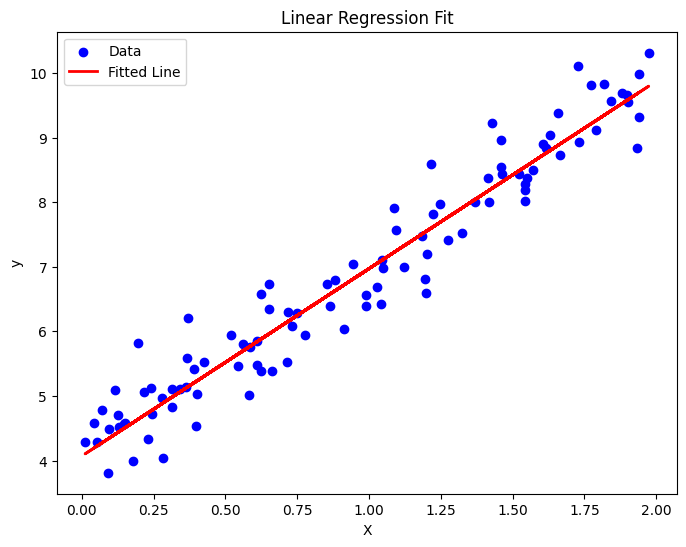

In [4]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1) # 100 ta sample , yeki feature
true_weights = np.array([4.0, 3.0]) # True weights: [bias, slope]
y = true_weights[0] + true_weights[1] * X[:, 0] + np.random.randn(100) * 0.5 # noise hara ezafe mikonim va ham mizanim 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # joda kardan data test va data train


model = LinearRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("calculated weights (bias, slope):", model.parameters)
print("true weights (bias, slope):", true_weights)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)

plt.figure(figsize=(8, 6))
plt.scatter(X, y, color="blue", label="Data")
plt.plot(X, model.predict(X), color="red", linewidth=2, label="Fitted Line")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()

### Polynomial Regression (25 points)


Polynomial Regression is an extension of Linear Regression that models the relationship between the dependent and independent variables as an nth-degree polynomial.

Given the features \(X\), polynomial regression tries to fit a model of the form:

$$
y = w_0 + w_1 X + w_2 X^2 + w_3 X^3 + \dots + w_n X^n
$$

Where:
- $X$ is the input feature.
- $w_0, w_1, \dots, w_n$ are the weights (coefficients) to be learned.
- $n$ is the degree of the polynomial.

To fit this model, we can use the same closed-form solution as in linear regression, but now the features include powers of $X$.


In [5]:

class PolynomialRegressor:
    def __init__(self, degree=2):
        self.degree = degree
        self.weights = None

    def fit(self, X, y):
        X_poly = np.hstack([X**i for i in range(self.degree + 1)])
        self.weights = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y

    def predict(self, X):
        X_poly = np.hstack([X**i for i in range(self.degree + 1)])
        return X_poly @ self.weights


Let's create a sample dataset of size 100 from following formula:

$$
y = x^4 - 4x^3 + 16 x + 4ϵ \ \ \ , \ \ \ x \in [-2, 2]
$$

where $\epsilon$ represents noise drawn from a $\mathcal{N}(0, 1)$ distribution.

The dataset will be split into 80% training data and 20% test data. Next, visualize the fitted polynomial curves for degrees ranging from 3 to 11. Additionally, compute and display the RMSE for both the training and test sets:

Shape of X: (100, 1)
Shape of y: (100, 1)


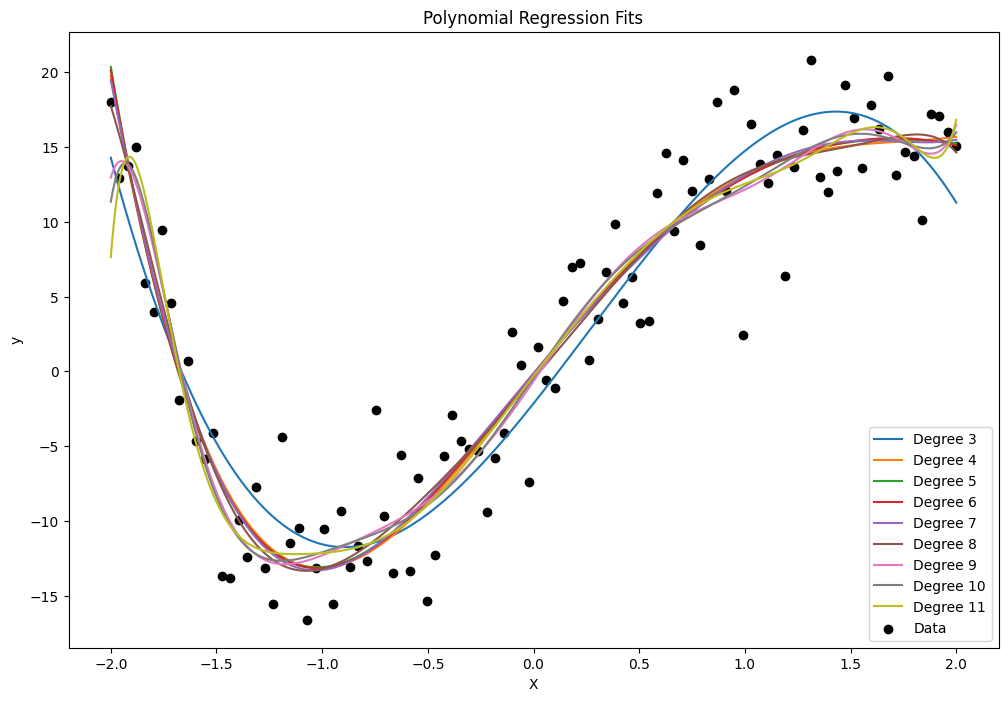

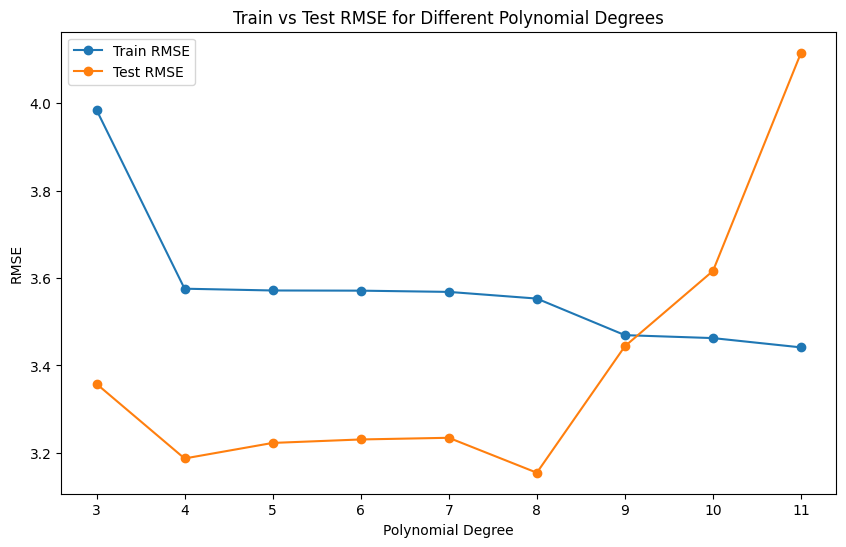

In [6]:
np.random.seed(42)
X = np.linspace(-2, 2, 100).reshape(-1, 1)
# noise = np.random.normal(0, 1, size=X.shape[0])
noise = np.random.normal(0, 1, size=X.shape[0]).reshape(-1, 1)

y = X**4 - 4 * X**3 + 16 * X + 4 * noise

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# split data into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degrees = range(3, 12)
train_rmse = []
test_rmse = []

plt.figure(figsize=(12, 8))

for degree in degrees:
    model = PolynomialRegressor(degree=degree)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # compute RMSE
    train_rmse.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    test_rmse.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

    X_plot = np.linspace(-2, 2, 500).reshape(-1, 1)
    y_plot = model.predict(X_plot)
    plt.plot(X_plot, y_plot, label=f"Degree {degree}")

# presentation
plt.scatter(X, y, color="black", label="Data")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Polynomial Regression Fits")
plt.legend()
plt.show()

# RMSE presentation
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_rmse, label="Train RMSE", marker="o")
plt.plot(degrees, test_rmse, label="Test RMSE", marker="o")
plt.xlabel("Polynomial Degree")
plt.ylabel("RMSE")
plt.title("Train vs Test RMSE for Different Polynomial Degrees")
plt.legend()
plt.show()

**Does this RMSE plot confirm your previous knowledge of the bias-variance tradeoff?**  

**Ans:**  yes, in lower polynomial degrees the bias is high because it is simple to capture the complexity of data, and the RSME result is high for training data and test data --> the model underfits the data.
in intermediate polynomial degrees the model is at a balance between bias and variance and this will explain the data without overfitting or underfitting and it will calculate the lowest RMSE value for both training and test data.
finally in higher polynomial degrees the variance will be high and the model start to learning noises this will become overfitting and the result in training data will be very low RMSE because of overfitting and in test data high RMSE 


**Could you explain the reason behind the change in RMSE behavior after a certain polynomial degree?**  

**Ans:** in lower degrees as the polynomial degree increases the flexibility of model will be increased to capture the underlying data pattern, the bios decreases because the model can approximate the true relationship between X and y , training and test RMSE decrease because the model imporved its fit without overfitting 
but in higher degrees as the polynomial degree increases beyond a certain degree the model will be too flexible and will start capturing noise data this will lead us to overffiting when the model performs well on training data but will fail to model unseen data


### Regularization (25 points)

Polynomial Regression can be enhanced with **regularization** to reduce the risk of overfitting, especially when working with high-degree polynomials. Two common regularization techniques are **Ridge Regression** and **Lasso Regression**, which modify the cost function to penalize large coefficients.

1. **Ridge Regression (L2 Regularization)**:
   Ridge regression penalizes the sum of the squared coefficients. The modified cost function is:
   $$
   J(w) = \frac{1}{2m} \| y - Xw \|^2 + \lambda \| w \|^2
   $$
   - $ \lambda $: Regularization strength.
   - $ \| w \|^2 $: Sum of squared weights.

2. **Lasso Regression (L1 Regularization)**:
   Lasso regression penalizes the sum of the absolute coefficients. The modified cost function is:
   $$
   J(w) = \frac{1}{2m} \| y - Xw \|^2 + \lambda \| w \|_1
   $$
   - $ \| w \|_1 $: Sum of absolute weights.


**Gradient Descent** is an iterative optimization algorithm used to minimize the cost function. For polynomial regression with regularization, the gradient updates are:

- For **Ridge**:
   $$
   w = w - \eta \left[ \frac{\partial J(w)}{\partial w} \right] = w - \eta \left[ \frac{1}{m} X^T (Xw - y) + \frac{\lambda}{m} w \right]
   $$

- For **Lasso**:
   $$
   w = w - \eta \left[ \frac{1}{m} X^T (Xw - y) + \frac{\lambda}{m} \cdot \text{sign}(w) \right]
   $$
   Where:
   - $ \eta $ is the learning rate.
   - $ \text{sign}(w) $ is the sign of the weights.


In [33]:
class PolynomialRegressorGD:
    def __init__(self, degree=2, regularization="ridge", lambda_=0.1, learning_rate=0.01, iterations=1000):
        self.degree = degree
        self.regularization = regularization
        self.lambda_ = lambda_
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None

    def _polynomial_features(self, X):
        n_samples = X.shape[0]
        poly_features = np.ones((n_samples, 1))
        for d in range(1, self.degree + 1):
            poly_features = np.hstack((poly_features, X ** d))
        return poly_features

    def fit(self, X, y):
        X_poly = self._polynomial_features(X)
        n_samples, n_features = X_poly.shape

        self.weights = np.zeros(n_samples)
        self.weights = np.zeros(n_features) 

        for _ in range(self.iterations):
            predictions = X_poly.dot(self.weights)
            errors = predictions - y.flatten()
            # Gradient computation
            if self.regularization == "ridge":
                gradient = (1 / n_samples) * X_poly.T.dot(errors) + (self.lambda_ / n_samples) * self.weights
            elif self.regularization == "lasso":
                gradient = (1 / n_samples) * X_poly.T.dot(errors) + (self.lambda_ / n_samples) * np.sign(self.weights)
            else:
                raise ValueError("Unsupported regularization type. Use 'ridge' or 'lasso'.")

            # Gradient descent update
            self.weights -= self.learning_rate * gradient

    def predict(self, X):
        return self._polynomial_features(X).dot(self.weights)


Using the previously created sample dataset, fit a polynomial regression model of degree 11. Test the RMSE of the model with regularization parameter values $ \{0.05, 0.1, 0.5, 1, 5, 10\} $.  

Plot the results to visualize the effect of $ \lambda $ on model performance.  


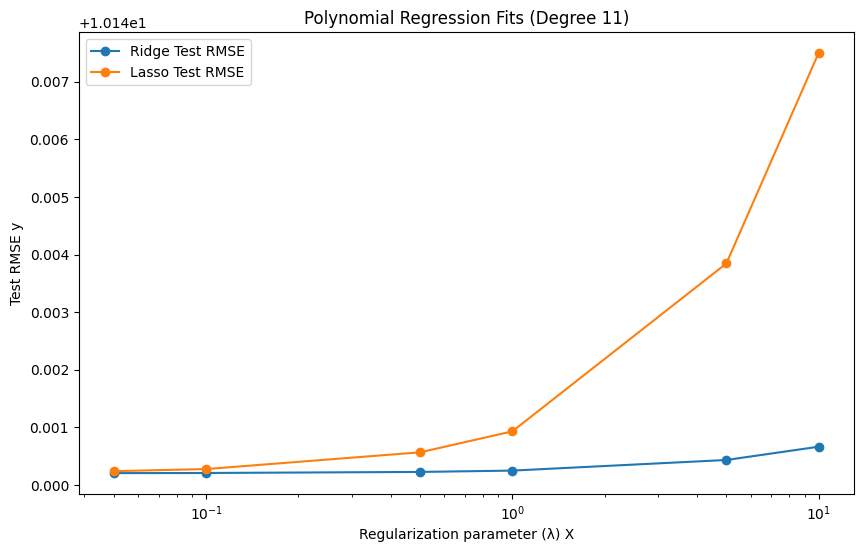

In [35]:
np.random.seed(42)
X = np.linspace(-2, 2, 100).reshape(-1, 1)
noise = np.random.normal(0, 1, size=X.shape[0]).reshape(-1, 1)
y = X**4 - 4 * X**3 + 16 * X + 4 * noise

# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize input data (standardization)
X_train_normalized = (X_train - np.mean(X_train)) / np.std(X_train)
X_test_normalized = (X_test - np.mean(X_train)) / np.std(X_train)

# Regularization parameter values
lambda_values = [0.05, 0.1, 0.5, 1, 5, 10]
test_rmse_ridge = []
test_rmse_lasso = []

#Ridge regression
for lambda_ in lambda_values:
    model_ridge = PolynomialRegressorGD(degree=11, lambda_=lambda_, learning_rate=1e-6, iterations=20000, regularization='ridge')
    model_ridge.fit(X_train_normalized, y_train)
    y_test_pred_ridge = model_ridge.predict(X_test_normalized)
    test_rmse_ridge.append(np.sqrt(mean_squared_error(y_test, y_test_pred_ridge)))

#Lasso regression
for lambda_ in lambda_values:
    model_lasso = PolynomialRegressorGD(degree=11, lambda_=lambda_, learning_rate=1e-6, iterations=20000, regularization='lasso')
    model_lasso.fit(X_train_normalized, y_train)
    y_test_pred_lasso = model_lasso.predict(X_test_normalized)
    test_rmse_lasso.append(np.sqrt(mean_squared_error(y_test, y_test_pred_lasso)))

# Plotting the dataset and predictions
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, test_rmse_ridge, label='Ridge Test RMSE', marker='o')
plt.plot(lambda_values, test_rmse_lasso, label='Lasso Test RMSE', marker='o')
plt.xlabel('Regularization parameter (λ) X')
plt.ylabel('Test RMSE y')
plt.xscale('log')
plt.legend()
plt.title("Polynomial Regression Fits (Degree 11)")
plt.show()

**Can you explain the behaviour of RMSE for both ridge and lasso regularization?**

**Ans: Ridge regularization (L2) shrinks all coefficients but doesn't eliminate them, reducing overfitting as "lambda_" increases. Lasso regularization (L1) also shrinks coefficients and can drive some to zero, effectively performing feature selection. Both regularizations reduce overfitting at moderate "lambda_" values, lowering test RMSE, but may cause underfitting if "lambda_" is too large. Ridge tends to keep all features, while Lasso produces sparser models.**

Generate a new sample dataset using the following formula:

$$
y = 2 \sin\left(\frac{\pi}{2} x\right) + \frac{1}{2} ϵ \quad , \quad x \in [-4, 4]
$$

where $ ϵ $ represents noise sampled from a $\mathcal{N}(0, 1) $ distribution. Plot the fitted polynomial with degrees ranging from 4 to 12 as well as the RMSE:


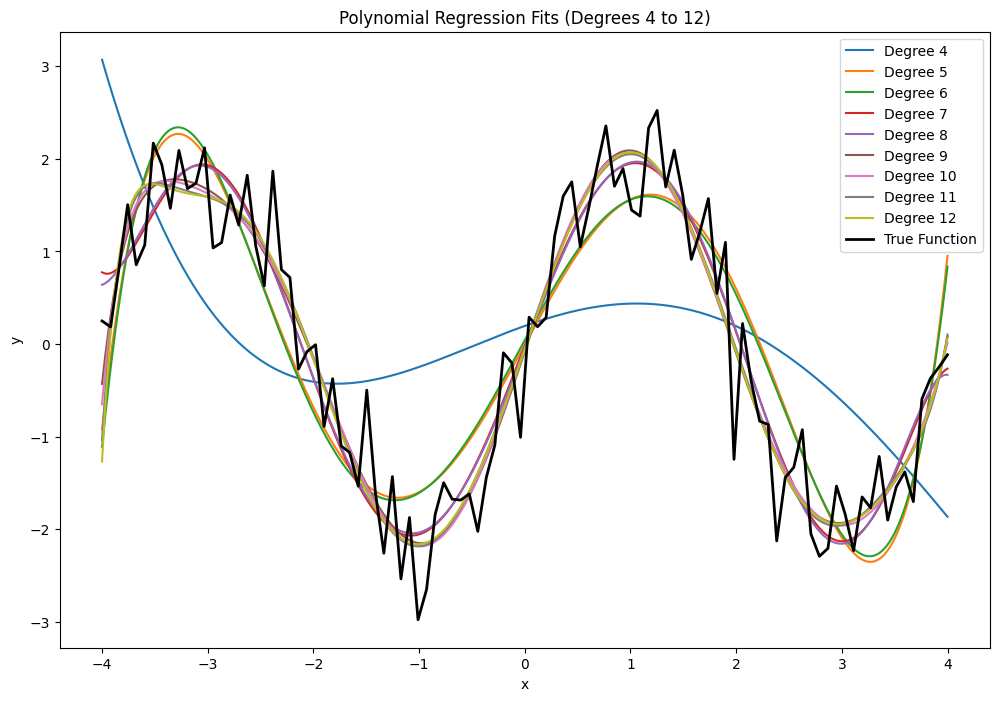

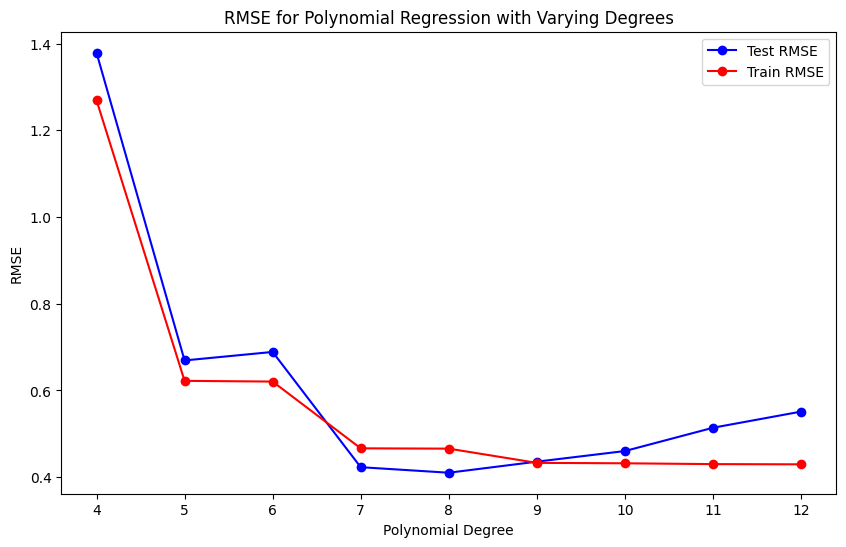

In [37]:
np.random.seed(42)
x = np.linspace(-4, 4, 100).reshape(-1, 1)
noise = np.random.normal(0, 1, size=x.shape[0]).reshape(-1, 1)
y = 2 * np.sin(np.pi / 2 * x) + 0.5 * noise

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

degrees = range(4, 13)
train_rmse = []
test_rmse = []

plt.figure(figsize=(12, 8))

for degree in degrees:
    poly = PolynomialFeatures(degree)
    x_train_poly = poly.fit_transform(x_train)
    x_test_poly = poly.transform(x_test)
    
    # Train polynomial regression model
    model = LinearRegression()
    model.fit(x_train_poly, y_train)
    
    y_train_pred = model.predict(x_train_poly)
    y_test_pred = model.predict(x_test_poly)
    
    # Calculate RMSE
    train_rmse.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    test_rmse.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
    
    x_range = np.linspace(-4, 4, 500).reshape(-1, 1)
    x_range_poly = poly.transform(x_range)
    y_range_pred = model.predict(x_range_poly)
    plt.plot(x_range, y_range_pred, label=f'Degree {degree}')

plt.plot(x, y, label="True Function", color='black', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Polynomial Regression Fits (Degrees 4 to 12)')
plt.show()

# Plot RMSE vs polynomial degree
plt.figure(figsize=(10, 6))
plt.plot(degrees, test_rmse, label='Test RMSE', marker='o', color='blue')
plt.plot(degrees, train_rmse, label='Train RMSE', marker='o', color='red')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.legend()
plt.title('RMSE for Polynomial Regression with Varying Degrees')
plt.show()


**Does this RMSE plot confirm your previous knowledge of the bias-variance tradeoff?**

**Ans: yes, the rmse plot confirms the bias-variance tradeoff.as the polynomial degree increases, the model initially reduces bias (underfitting) and improves generalization, leading to a decrease in test RMSE.however, beyond a certain degree, the model begins to overfit, causing test RMSE to rise due to high variance, while training RMSE continues to decrease.**


**Could you explain what is the reason behind the change in behavior of RMSE after some degree? (Hint: you may look at the interval chosen)**

**Ans: The change in RMSE behavior occurs due to the model becoming more complex as the degree increases. Initially, increasing the degree reduces bias by fitting the data better. However, after a certain degree, the model starts to overfit the noise in the training data, which leads to higher variance and an increase in test RMSE, confirming the model is too complex for the underlying data. The choice of the degree directly impacts this transition.**


Using the previously created sample dataset, fit a polynomial regression model of degree 11. Test the RMSE of the model with regularization parameter values $ \{0.05, 0.1, 0.5, 1, 5, 10\} $.  

Plot the results to visualize the effect of $ \lambda $ on model performance.  


c:\Users\mahdi.ak\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.313e+01, tolerance: 1.834e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\mahdi.ak\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.327e+01, tolerance: 1.834e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\mahdi.ak\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, chec

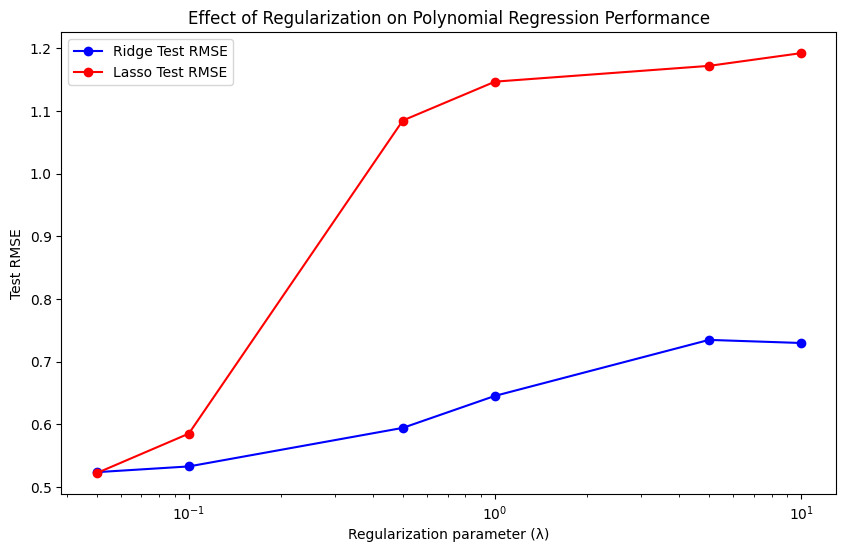

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split

# Data generation
np.random.seed(42)
x = np.linspace(-4, 4, 100).reshape(-1, 1)
noise = np.random.normal(0, 1, size=x.shape[0]).reshape(-1, 1)
y = 2 * np.sin(np.pi / 2 * x) + 0.5 * noise

# Data splitting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

lambda_values = [0.05, 0.1, 0.5, 1, 5, 10]
test_rmse_ridge = []
test_rmse_lasso = []

for lambda_ in lambda_values:
    # Ridge regression
    ridge_model = Ridge(alpha=lambda_)
    poly = PolynomialFeatures(degree=11)
    x_train_poly = poly.fit_transform(x_train)
    x_test_poly = poly.transform(x_test)
    
    ridge_model.fit(x_train_poly, y_train)
    y_test_pred_ridge = ridge_model.predict(x_test_poly)
    test_rmse_ridge.append(np.sqrt(mean_squared_error(y_test, y_test_pred_ridge)))
    
    # Lasso regression
    lasso_model = Lasso(alpha=lambda_)
    lasso_model.fit(x_train_poly, y_train)
    y_test_pred_lasso = lasso_model.predict(x_test_poly)
    test_rmse_lasso.append(np.sqrt(mean_squared_error(y_test, y_test_pred_lasso)))

plt.figure(figsize=(10, 6))
plt.plot(lambda_values, test_rmse_ridge, label='Ridge Test RMSE', marker='o', color='blue')
plt.plot(lambda_values, test_rmse_lasso, label='Lasso Test RMSE', marker='o', color='red')
plt.xlabel('Regularization parameter (λ)')
plt.ylabel('Test RMSE')
plt.xscale('log')
plt.legend()
plt.title('Effect of Regularization on Polynomial Regression Performance')
plt.show()


**Can you explain the behaviour of RMSE for both ridge and lasso regularization?**

**Ans: As the regularization parameter 
λ increases, both Ridge and Lasso regularization reduce the model complexity, which initially lowers the RMSE by preventing overfitting. However, beyond a certain point, further increasing 
λ leads to underfitting, where the model's ability to fit the data decreases, resulting in a higher RMSE. **

**What is the main difference between this section and the last section?**

**Ans: The main difference is the inclusion of regularization in this section. While the previous section focused on polynomial regression without regularization, this section explores the effect of different regularization strengths (Ridge and Lasso) on the model's performance, specifically testing how the regularization parameter 
𝜆
λ impacts RMSE.**

## Poissson Regression (40 points)

Poisson regression is a type of Generalized Linear Model (GLM) used for modeling count data and event occurrence rates. It assumes that the response variable $y$ follows a Poisson distribution and models the logarithm of the expected value of $y$ as a linear function of the predictors.

### Characteristics
- **Response Variable**: Count data (non-negative integers).
- **Link Function**: Logarithm function.
- **Assumption**: The mean and variance of the response variable are equal (although this can be relaxed in quasi-Poisson models).

### Model Definition
The Poisson regression model can be written as:
$y_i \sim \text{Poisson}(\mu_i)$

where $y_i$ is the observed count for the $i_{th}$ observation, and $\mu_i$ is the expected value of $y_i$.

The relationship between the predictors and $\mu_i$ is expressed as:
$\log(\mu_i) = \mathbf{x}_i^\top \boldsymbol{\beta}$

where:
- $\mathbf{x}_i = [x_{i1}, x_{i2}, \ldots, x_{ip}]^\top$: The vector of predictors for the $i_th$ observation.
- $\boldsymbol{\beta} = [\beta_0, \beta_1, \ldots, \beta_p]^\top$: The vector of coefficients.

Alternatively, in terms of $\mu_i = \exp(\mathbf{x}_i^\top \boldsymbol{\beta})$

### Log-Likelihood Function
The log-likelihood function for Poisson regression is:

$$\ell(\boldsymbol{\beta}) = \sum_{i=1}^n \left[ y_i \log(\mu_i) - \mu_i - \log(y_i!) \right]$$
where $\mu_i = \exp(\mathbf{x}_i^\top \boldsymbol{\beta})$.

### Gradient (Score Function)
The gradient of the log-likelihood with respect to $\beta$ is:
$\frac{\partial \ell}{\partial \boldsymbol{\beta}} = \sum_{i=1}^n \mathbf{x}_i (y_i - \mu_i)$

### Now, write your Poisson Regression class (10 points)

In [40]:
class PoissonRegression:
    def __init__(self, learning_rate=0.001, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.beta = None  # Initialize coefficients

    def _log_likelihood(self, X, y):
        mu = np.exp(X @ self.beta)
        log_likelihood = np.sum(y * np.log(mu) - mu - np.log(np.factorial(y)))
        return log_likelihood

    def _gradient_descent(self, X, y):
        #(mu = exp(X @ beta))
        mu = np.exp(X @ self.beta)
        
        # Gradient
        gradient = X.T @ (y - mu)
        
        # Update coefficients
        self.beta += self.learning_rate * gradient

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.beta = np.zeros(n_features)
        for _ in range(self.epochs):
            self._gradient_descent(X, y)


    def predict(self, x):
        return np.exp(X @ self.beta)


### Generate Dataset (10 points)
Generate poisson data using numpy.

In [41]:
np.random.seed(42)
b0 = 1
b1 = 0.15
# poisson data

X = np.linspace(0, 10, 100)  # 100 data points
X = X.reshape(-1, 1)

mu = np.exp(b0 + b1 * X)  # Poisson mean as an exponential function of X

y = np.random.poisson(mu)


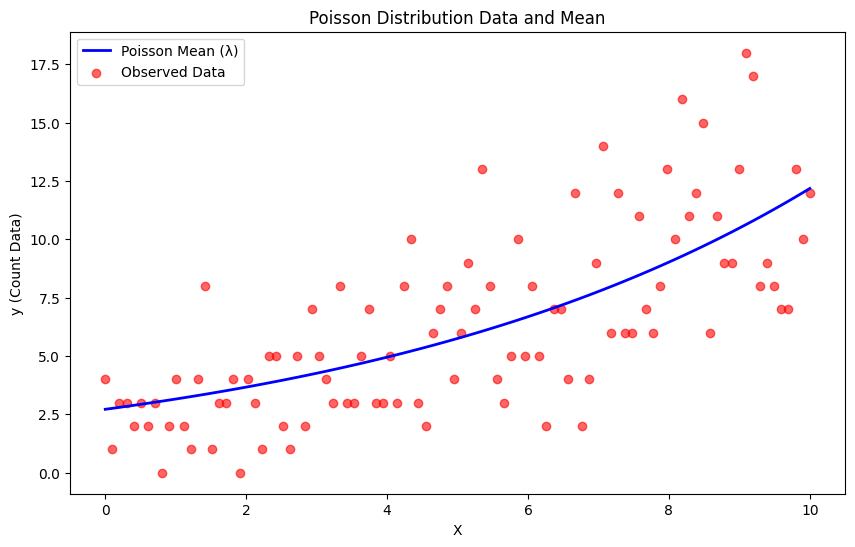

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(X, mu, label='Poisson Mean (λ)', color='blue', linewidth=2)
plt.scatter(X, y, color='red', alpha=0.6, label='Observed Data')
plt.xlabel('X')
plt.ylabel('y (Count Data)')
plt.title('Poisson Distribution Data and Mean')
plt.legend()
plt.show()

### Fit poisson regression on data and plot the predicted poisson regression (10 points)

In [49]:
class PoissonRegression:
    def __init__(self, learning_rate=0.001, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.beta = None  # Initialize coefficients

    def _log_likelihood(self, X, y):
        mu = np.exp(X @ self.beta)
        return np.sum(y * np.log(mu) - mu - np.log(np.arange(1, y + 1)).sum())

    def _gradient_descent(self, X, y):
        for _ in range(self.epochs):
            mu = np.exp(X @ self.beta)
            gradient = X.T @ (y - mu)
            self.beta += self.learning_rate * gradient

    def fit(self, X, y):
        n_features = X.shape[1]
        self.beta = np.zeros(n_features)  # Initialize coefficients
        self._gradient_descent(X, y)

    def predict(self, X):
        return np.exp(X @ self.beta)


C:\Users\mahdi.ak\AppData\Local\Temp\ipykernel_14760\2065926610.py:13: RuntimeWarning: overflow encountered in exp
  mu = np.exp(X @ self.beta)
C:\Users\mahdi.ak\AppData\Local\Temp\ipykernel_14760\2065926610.py:14: RuntimeWarning: invalid value encountered in matmul
  gradient = X.T @ (y - mu)


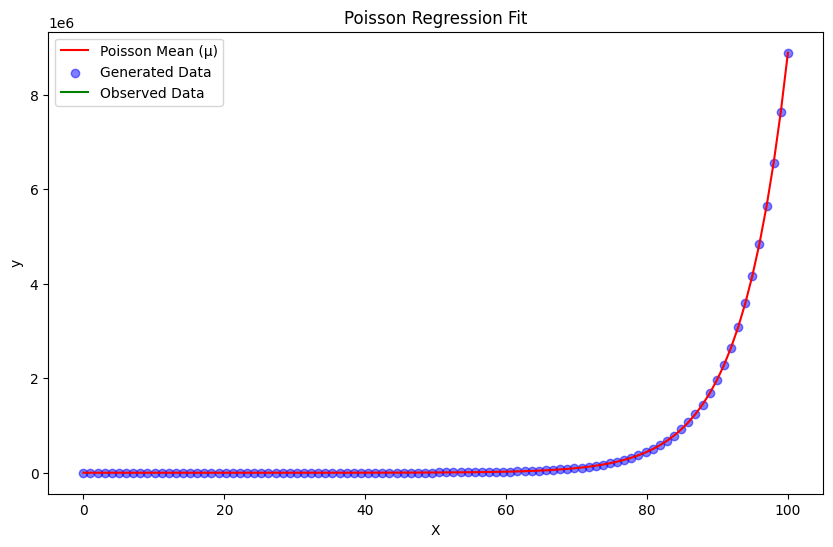

In [58]:
np.random.seed(42)
b0 = 1
b1 = 0.15
X = np.linspace(0, 100, 100).reshape(-1, 1)  # 100 data points from 0 to 100
X = np.hstack((np.ones((X.shape[0], 1)), X))  # Add intercept term
mu = np.exp(b0 + b1 * X[:, 1])
y = np.random.poisson(mu)

model = PoissonRegression(learning_rate=0.001, epochs=10000)
model.fit(X, y)

y_pred = model.predict(X)

plt.figure(figsize=(10, 6))
plt.plot(X[:, 1], mu, label='Poisson Mean (μ)', color='red')
plt.scatter(X[:, 1], y, label='Generated Data', color='blue', alpha=0.5)
plt.plot(X[:, 1], y_pred, label='Observed Data', color='green')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Poisson Regression Fit')
plt.show()


### Use different learning rate and plot your prediction (10 points)

C:\Users\mahdi.ak\AppData\Local\Temp\ipykernel_14760\2027608172.py:16: RuntimeWarning: overflow encountered in exp
  mu = np.exp(X @ self.beta)
C:\Users\mahdi.ak\AppData\Local\Temp\ipykernel_14760\2027608172.py:16: RuntimeWarning: invalid value encountered in matmul
  mu = np.exp(X @ self.beta)


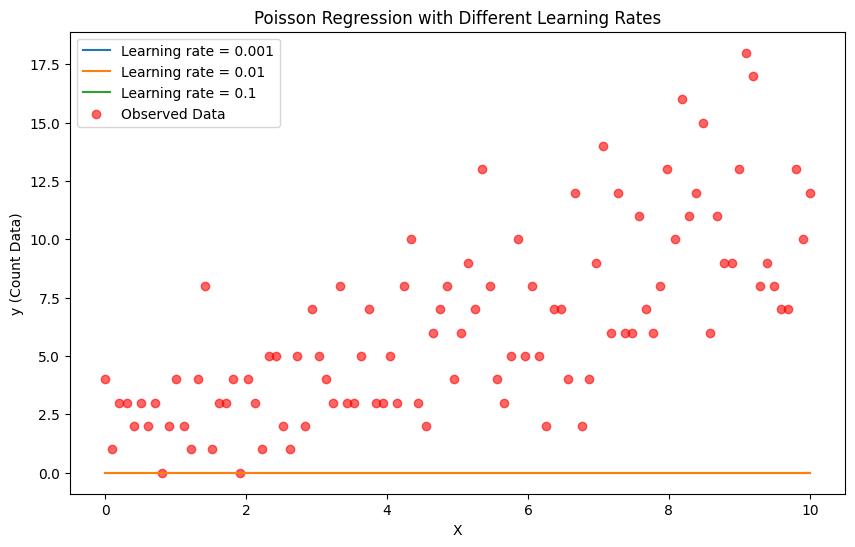

In [60]:
import numpy as np
import matplotlib.pyplot as plt

class PoissonRegression:
    def __init__(self, learning_rate=0.001, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.beta = None  # Initialize coefficients

    def _log_likelihood(self, X, y):
        mu = np.exp(X @ self.beta)
        log_likelihood = np.sum(y * np.log(mu) - mu - np.log(np.factorial(y)))
        return log_likelihood

    def _gradient_descent(self, X, y):
        mu = np.exp(X @ self.beta)
        gradient = X.T @ (y.reshape(-1, 1) - mu.reshape(-1, 1))  # Ensure correct shape for broadcasting
        self.beta += self.learning_rate * gradient.flatten()  # Flatten gradient to match the shape of beta

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.beta = np.zeros(n_features)
        for _ in range(self.epochs):
            self._gradient_descent(X, y)

    def predict(self, X):
        return np.exp(X @ self.beta)

np.random.seed(42)
b0 = 1
b1 = 0.15

X = np.linspace(0, 10, 100).reshape(-1, 1)

mu = np.exp(b0 + b1 * X)

y = np.random.poisson(mu)

X_bias = np.hstack([np.ones((X.shape[0], 1)), X])

# Define different learning rates to test
learning_rates = [0.001, 0.01, 0.1]

plt.figure(figsize=(10, 6))

for lr in learning_rates:
    poisson_model = PoissonRegression(learning_rate=lr, epochs=10000)
    poisson_model.fit(X_bias, y)
    y_pred = poisson_model.predict(X_bias)
    plt.plot(X, y_pred, label=f'Learning rate = {lr}')

plt.scatter(X, y, color='red', alpha=0.6, label='Observed Data')
plt.xlabel('X')
plt.ylabel('y (Count Data)')
plt.title('Poisson Regression with Different Learning Rates')
plt.legend()
plt.show()
